In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

# Generate synthetic business data for logistic regression
np.random.seed(42)  # For reproducibility

# Independent variable: Customer Age
customer_age = np.random.randint(18, 65, 100)  # Age between 18 and 65

# Dependent variable: Purchase Decision (0 or 1)
# Probability of purchase increases with age (simplified model)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate probabilities and binary outcomes
purchase_prob = sigmoid((customer_age - 40) / 4)  # Centered around age 40
purchase_decision = np.random.binomial(1, purchase_prob)

# Create a DataFrame
data = pd.DataFrame({
    'Customer_Age': customer_age,
    'Purchase_Decision': purchase_decision
})

# Save the dataset to a CSV file
data.to_csv('business_logistic_regression_dataset.csv', index=False)

print("Dataset saved as 'business_logistic_regression_dataset.csv'")

Dataset saved as 'business_logistic_regression_dataset.csv'


In [152]:
df = pd.read_csv('business_logistic_regression_dataset.csv')
df

,Customer_Age,Purchase_Decision
0,56,1
1,46,1
2,32,0
3,60,1
4,25,0
...,...,...
95,24,0
96,26,0
97,41,0
98,18,0


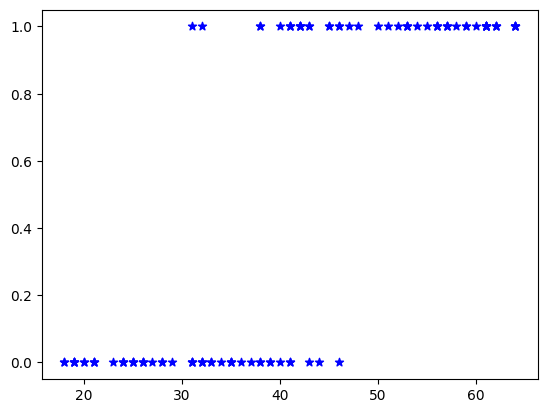

In [153]:
plt.scatter(df.Customer_Age,df.Purchase_Decision,marker='*',color='blue')

In [154]:
from sklearn.model_selection import train_test_split

In [155]:
X_train, X_test, y_train, y_test = train_test_split(df[['Customer_Age']],df.Purchase_Decision,train_size=0.8,random_state=35)

In [156]:
X_test

,Customer_Age
40,26
71,27
98,18
27,61
70,51
31,45
10,28
24,50
51,64
35,61


In [157]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [158]:
model.fit(X_train, y_train)

LogisticRegression()

In [159]:
X_test

,Customer_Age
40,26
71,27
98,18
27,61
70,51
31,45
10,28
24,50
51,64
35,61


In [160]:
y_pred = model.predict(X_test)

In [161]:
y_test

40    0
71    0
98    0
27    1
70    1
31    1
10    0
24    1
51    1
35    1
13    1
43    0
77    0
48    0
92    1
0     1
41    1
68    1
67    0
95    0
Name: Purchase_Decision, dtype: int64

In [162]:
y_pred

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0])

In [163]:
model.predict_proba(X_test)

array([[0.97877101, 0.02122899],
       [0.97226177, 0.02773823],
       [0.99758554, 0.00241446],
       [0.00313139, 0.99686861],
       [0.04644282, 0.95355718],
       [0.20144624, 0.79855376],
       [0.96383043, 0.03616957],
       [0.06020755, 0.93979245],
       [0.00137835, 0.99862165],
       [0.00313139, 0.99686861],
       [0.00931588, 0.99068412],
       [0.99452194, 0.00547806],
       [0.92131492, 0.07868508],
       [0.99682651, 0.00317349],
       [0.00238241, 0.99761759],
       [0.01221791, 0.98778209],
       [0.01221791, 0.98778209],
       [0.30384658, 0.69615342],
       [0.7963901 , 0.2036099 ],
       [0.98761935, 0.01238065]])

In [164]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)

In [165]:
accuracy 

1.0

In [166]:
print("Model Accuracy:", accuracy)

# Verify predictions
print("Predicted:", y_pred)
print("Actual:", y_test.values)

Model Accuracy: 1.0
Predicted: [0 0 0 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0]
Actual: [0 0 0 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0]


In [167]:
X_test

,Customer_Age
40,26
71,27
98,18
27,61
70,51
31,45
10,28
24,50
51,64
35,61


In [168]:
from sklearn.metrics import confusion_matrix

In [169]:
cm = confusion_matrix(y_test,y_pred)

In [170]:
cm

array([[ 9,  0],
       [ 0, 11]])

In [171]:
import seaborn as sns

Text(58.222222222222214, 0.5, 'Truth')

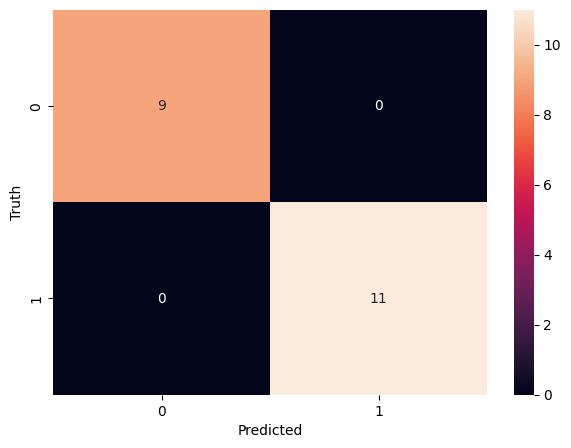

In [172]:
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [173]:
from sklearn.metrics import classification_report

In [174]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        11

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [175]:
# Get weight (w) and bias (b)
w = model.coef_[0][0]  # Slope
b = model.intercept_[0]  # Intercept

In [176]:
w

np.float64(0.27411629499651347)

In [177]:
b

np.float64(-10.957953531761941)

In [178]:
# Prediction Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [179]:
def predict_probability(age):
    z = w * age + b
    probability = sigmoid(z)
    return probability

In [180]:
df.sample()

,Customer_Age,Purchase_Decision
46,26,0


In [181]:
age_to_predict = 40
probability = predict_probability(age_to_predict)

In [182]:
probability

np.float64(0.5016745607636395)